In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


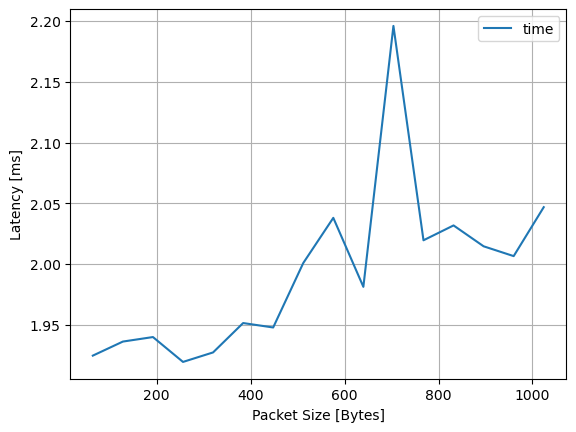

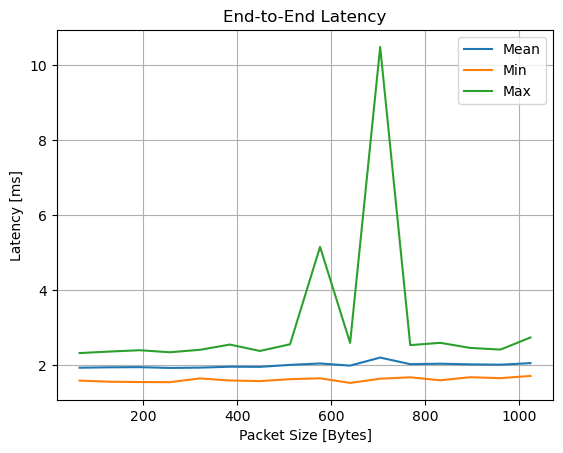

In [3]:
df = pd.read_csv("end-2-end_small.csv")
df["time"] = df["time"] * 1000
df = df.drop(["count"], axis=1)

df.groupby("size").mean().plot(legend=True)
plt.xlabel("Packet Size [Bytes]")
plt.ylabel("Latency [ms]")
plt.grid()
plt.show()

dg = df.groupby("size").describe().reset_index().plot(x=0, y=[2, 4, 8], legend=False)
plt.xlabel("Packet Size [Bytes]")
plt.ylabel("Latency [ms]")
plt.grid()
plt.legend(["Mean", "Min", "Max"])
plt.title("End-to-End Latency")
plt.savefig("small-packets-end-to-end-latency.png")
plt.show()

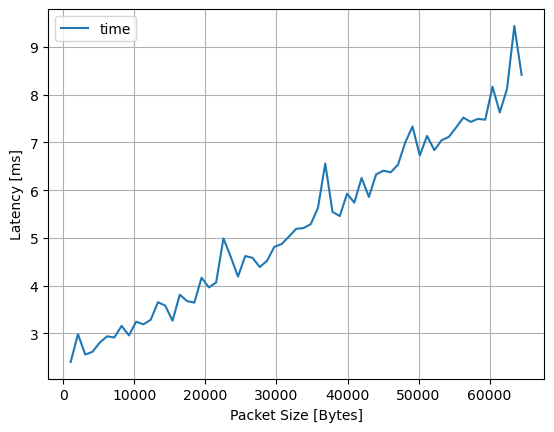

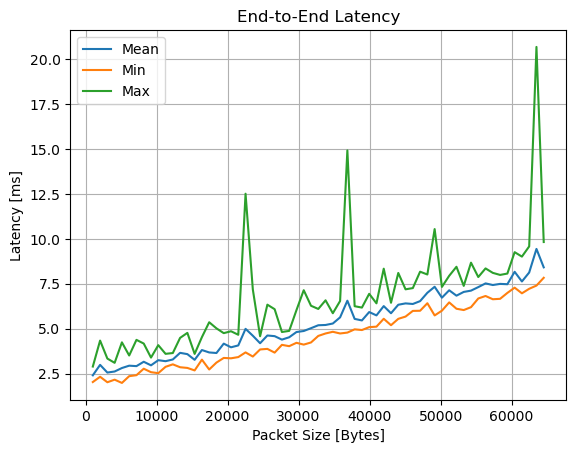

In [4]:
df = pd.read_csv("end-2-end_large.csv")
df["time"] = df["time"] * 1000

df.groupby("size").mean().plot(legend=True)
plt.xlabel("Packet Size [Bytes]")
plt.ylabel("Latency [ms]")
plt.grid()
plt.show()

dg = df.groupby("size").describe().reset_index().plot(x=0, y=[2, 4, 8], legend=False)
plt.xlabel("Packet Size [Bytes]")
plt.ylabel("Latency [ms]")
plt.grid()
plt.legend(["Mean", "Min", "Max"])
plt.title("End-to-End Latency")
plt.savefig("small-packets-end-to-end-latency.png")
plt.show()